# XGB TRIAL1

In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# ✅ 1. Load the dataset
data_path = r'C:\Users\AMON\Desktop\C200\extras\cleaned_dataset_iqrered.csv'
df = pd.read_csv(data_path)

# ✅ 2. Preprocessing
# Selecting relevant features
features = ["sqft_living", "no_of_bedrooms", "no_of_bathrooms", "sqft_lot", "no_of_floors", "house_age", "zipcode"]
target = "price"

X = df[features]
y = df[target]

# ✅ 3. One-Hot Encoding for 'zipcode'
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X[['zipcode']])

# Convert encoded data into DataFrame
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['zipcode']))
X = X.drop(columns=['zipcode'])  # Remove original categorical column
X = pd.concat([X, encoded_df], axis=1)  # Merge encoded data

# ✅ 4. Split data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ 5. Train the XGBoost Model
xgb_model = xgb.XGBRegressor(n_estimators=5000, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# ✅ 6. Make Predictions on Test Set
y_pred = xgb_model.predict(X_test)

# ✅ 7. Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# ✅ 8. Compute Confidence Interval for Prediction
std_dev = np.std(y_test - y_pred)
ci_min = y_pred - (1.96 * std_dev)
ci_max = y_pred + (1.96 * std_dev)

# ✅ 9. Feature Importance Analysis
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": xgb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# ✅ 10. Simulating User Input (as an example)
user_input = {
    "sqft_living": 2500,  # square footage of living area
    "no_of_bedrooms": 3,  # number of bedrooms
    "no_of_bathrooms": 2,  # number of bathrooms
    "sqft_lot": 6000,  # square footage of lot
    "no_of_floors": 2,  # number of floors
    "house_age": 20,  # age of house in years
    "zipcode": "98001"  # zipcode
}

# ✅ 11. Apply One-Hot Encoding to User Input for Zipcode
user_input_df = pd.DataFrame([user_input])  # Convert to DataFrame
user_encoded = encoder.transform(user_input_df[['zipcode']])  # Apply the same encoder

# Convert encoded user input into DataFrame
encoded_user_input = pd.DataFrame(user_encoded, columns=encoder.get_feature_names_out(['zipcode']))
user_input_df = user_input_df.drop(columns=['zipcode'])  # Remove original 'zipcode' column
user_input_df = pd.concat([user_input_df, encoded_user_input], axis=1)  # Merge encoded data

# ✅ 12. Make Prediction for User Input
user_pred = xgb_model.predict(user_input_df)

# Compute Confidence Interval for User Input
user_std_dev = np.std(y_test - y_pred)  # Use test set residuals for std deviation
user_ci_min = user_pred - (1.96 * user_std_dev)
user_ci_max = user_pred + (1.96 * user_std_dev)

# ✅ 13. Display Results for User Input
print(f"User Predicted Price: {user_pred[0]}")
print(f"Confidence Interval for User Input: {user_ci_min[0]} - {user_ci_max[0]}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}\n")

print("Feature Importance:")
print(feature_importances)


User Predicted Price: 521227.84375
Confidence Interval for User Input: 341778.2648935785 - 700677.4226064215
Mean Absolute Error: 64870.84138844153
R-squared: 0.7812457839653018

Feature Importance:
          Feature  Importance
9   zipcode_98004    0.081178
19  zipcode_98023    0.060029
31  zipcode_98040    0.059020
7   zipcode_98002    0.049799
24  zipcode_98030    0.045877
..            ...         ...
40  zipcode_98065    0.000957
15  zipcode_98011    0.000939
20  zipcode_98024    0.000676
22  zipcode_98028    0.000659
68  zipcode_98155    0.000569

[76 rows x 2 columns]


# random forests code

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# ✅ 1. Load the dataset
data_path = r'C:\Users\AMON\Desktop\C200\data\processed\cleaned_dataset_iqrered.csv'
df = pd.read_csv(data_path)

# ✅ 2. Preprocessing
# Selecting relevant features
features = ["sqft_living", "no_of_bedrooms", "no_of_bathrooms", "sqft_lot", "no_of_floors", "house_age", "zipcode"]
target = "price"

X = df[features]
y = df[target]

# ✅ 3. One-Hot Encoding for 'zipcode'
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X[['zipcode']])

# Convert encoded data into DataFrame
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['zipcode']))
X = X.drop(columns=['zipcode'])  # Remove original categorical column
X = pd.concat([X, encoded_df], axis=1)  # Merge encoded data

# ✅ 4. Split data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ 5. Train the Random Forest Model
rf_model = RandomForestRegressor(n_estimators=500, max_depth=20, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# ✅ 6. Make Predictions on Test Set
y_pred = rf_model.predict(X_test)

# ✅ 7. Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# ✅ 8. Compute Confidence Interval for Prediction
std_dev = np.std(y_test - y_pred)
ci_min = y_pred - (1.96 * std_dev)
ci_max = y_pred + (1.96 * std_dev)

# ✅ 9. Feature Importance Analysis
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# ✅ 10. Simulating User Input (as an example)
user_input = {
    "sqft_living": 2500,  # square footage of living area
    "no_of_bedrooms": 3,  # number of bedrooms
    "no_of_bathrooms": 2,  # number of bathrooms
    "sqft_lot": 6000,  # square footage of lot
    "no_of_floors": 2,  # number of floors
    "house_age": 20,  # age of house in years
    "zipcode": "98001"  # zipcode
}

# ✅ 11. Apply One-Hot Encoding to User Input for Zipcode
user_input_df = pd.DataFrame([user_input])  # Convert to DataFrame
user_encoded = encoder.transform(user_input_df[['zipcode']])  # Apply the same encoder

# Convert encoded user input into DataFrame
encoded_user_input = pd.DataFrame(user_encoded, columns=encoder.get_feature_names_out(['zipcode']))
user_input_df = user_input_df.drop(columns=['zipcode'])  # Remove original 'zipcode' column
user_input_df = pd.concat([user_input_df, encoded_user_input], axis=1)  # Merge encoded data

# ✅ 12. Make Prediction for User Input
user_pred = rf_model.predict(user_input_df)

# Compute Confidence Interval for User Input
user_std_dev = np.std(y_test - y_pred)  # Use test set residuals for std deviation
user_ci_min = user_pred - (1.96 * user_std_dev)
user_ci_max = user_pred + (1.96 * user_std_dev)

# ✅ 13. Display Results for User Input
print(f"User Predicted Price: {user_pred[0]:,.2f}")
print(f"Confidence Interval for User Input: {user_ci_min[0]:,.2f} - {user_ci_max[0]:,.2f}")
print(f"Mean Absolute Error: {mae:,.2f}")
print(f"R-squared: {r2:.4f}\n")

print("Feature Importance:")
print(feature_importances)


User Predicted Price: 535,744.56
Confidence Interval for User Input: 328,000.52 - 743,488.61
Mean Absolute Error: 78,107.32
R-squared: 0.7066

Feature Importance:
          Feature  Importance
0     sqft_living    0.485967
5       house_age    0.082138
3        sqft_lot    0.078808
9   zipcode_98004    0.028232
31  zipcode_98040    0.020420
..            ...         ...
16  zipcode_98014    0.000231
20  zipcode_98024    0.000183
33  zipcode_98045    0.000172
45  zipcode_98077    0.000162
67  zipcode_98148    0.000052

[76 rows x 2 columns]


# code for decision trees

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# ✅ 1. Load the dataset
data_path = r'C:\Users\AMON\Desktop\C200\data\processed\cleaned_dataset_iqrered.csv'
df = pd.read_csv(data_path)

# ✅ 2. Preprocessing
# Selecting relevant features
features = ["sqft_living", "no_of_bedrooms", "no_of_bathrooms", "sqft_lot", "no_of_floors", "house_age", "zipcode"]
target = "price"

X = df[features]
y = df[target]

# ✅ 3. One-Hot Encoding for 'zipcode'
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X[['zipcode']])

# Convert encoded data into DataFrame
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['zipcode']))
X = X.drop(columns=['zipcode'])  # Remove original categorical column
X = pd.concat([X, encoded_df], axis=1)  # Merge encoded data

# ✅ 4. Split data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ 5. Train the Decision Tree Model
dt_model = DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42)
dt_model.fit(X_train, y_train)

# ✅ 6. Make Predictions on Test Set
y_pred = dt_model.predict(X_test)

# ✅ 7. Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# ✅ 8. Compute Confidence Interval for Prediction
std_dev = np.std(y_test - y_pred)
ci_min = y_pred - (1.96 * std_dev)
ci_max = y_pred + (1.96 * std_dev)

# ✅ 9. Feature Importance Analysis
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": dt_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# ✅ 10. Simulating User Input (as an example)
user_input = {
    "sqft_living": 2500,  # square footage of living area
    "no_of_bedrooms": 3,  # number of bedrooms
    "no_of_bathrooms": 2,  # number of bathrooms
    "sqft_lot": 6000,  # square footage of lot
    "no_of_floors": 2,  # number of floors
    "house_age": 20,  # age of house in years
    "zipcode": "98001"  # zipcode
}

# ✅ 11. Apply One-Hot Encoding to User Input for Zipcode
user_input_df = pd.DataFrame([user_input])  # Convert to DataFrame
user_encoded = encoder.transform(user_input_df[['zipcode']])  # Apply the same encoder

# Convert encoded user input into DataFrame
encoded_user_input = pd.DataFrame(user_encoded, columns=encoder.get_feature_names_out(['zipcode']))
user_input_df = user_input_df.drop(columns=['zipcode'])  # Remove original 'zipcode' column
user_input_df = pd.concat([user_input_df, encoded_user_input], axis=1)  # Merge encoded data

# ✅ 12. Make Prediction for User Input
user_pred = dt_model.predict(user_input_df)

# Compute Confidence Interval for User Input
user_std_dev = np.std(y_test - y_pred)  # Use test set residuals for std deviation
user_ci_min = user_pred - (1.96 * user_std_dev)
user_ci_max = user_pred + (1.96 * user_std_dev)

# ✅ 13. Display Results for User Input
print(f"User Predicted Price: {user_pred[0]:,.2f}")
print(f"Confidence Interval for User Input: {user_ci_min[0]:,.2f} - {user_ci_max[0]:,.2f}")
print(f"Mean Absolute Error: {mae:,.2f}")
print(f"R-squared: {r2:.4f}\n")

print("Feature Importance:")
print(feature_importances)


User Predicted Price: 482,652.89
Confidence Interval for User Input: 218,474.67 - 746,831.11
Mean Absolute Error: 105,371.50
R-squared: 0.5260

Feature Importance:
          Feature  Importance
0     sqft_living    0.626911
5       house_age    0.072636
3        sqft_lot    0.060039
9   zipcode_98004    0.033634
19  zipcode_98023    0.028491
..            ...         ...
41  zipcode_98070    0.000000
12  zipcode_98007    0.000000
45  zipcode_98077    0.000000
44  zipcode_98075    0.000000
22  zipcode_98028    0.000000

[76 rows x 2 columns]


log transformation xgb

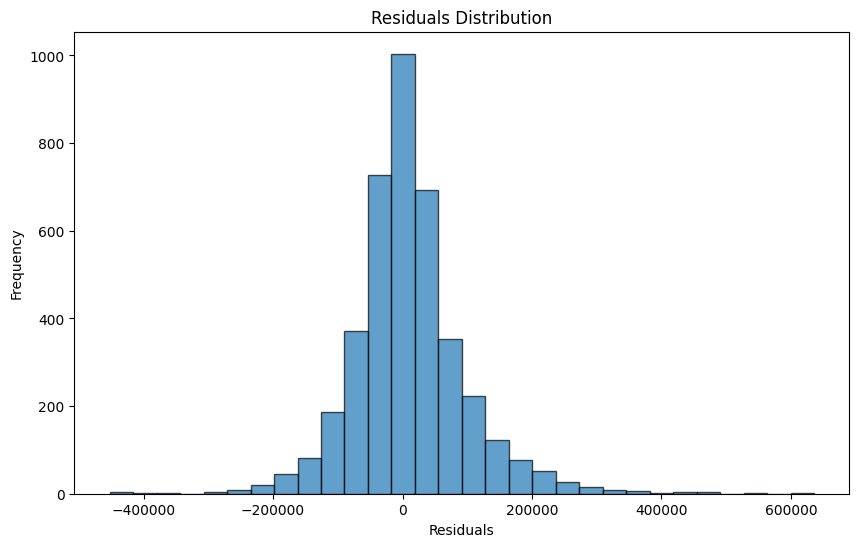

User Predicted Price: 520520.375
Confidence Interval for User Input: 350443.90423959045 - 690596.8457604095
Mean Absolute Error: 60963.88561927033
R-squared: 0.8011427886417324

Feature Importance:
                            Feature  Importance
244   no_of_bathrooms zipcode_98023    0.017571
74                    zipcode_98198    0.014687
46                    zipcode_98092    0.012996
175    no_of_bedrooms zipcode_98030    0.012018
32                    zipcode_98042    0.011956
...                             ...         ...
1306    zipcode_98022 zipcode_98045    0.000000
1307    zipcode_98022 zipcode_98052    0.000000
1308    zipcode_98022 zipcode_98053    0.000000
1309    zipcode_98022 zipcode_98055    0.000000
3001                zipcode_98199^2    0.000000

[3002 rows x 2 columns]


In [5]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
import matplotlib.pyplot as plt

# ✅ 1. Load the dataset
data_path = r'C:\Users\AMON\Desktop\C200\data\processed\cleaned_dataset_iqrered.csv'
df = pd.read_csv(data_path)

# ✅ 2. Preprocessing
# Selecting relevant features
features = ["sqft_living", "no_of_bedrooms", "no_of_bathrooms", "sqft_lot", "no_of_floors", "house_age", "zipcode"]
target = "price"

X = df[features]
y = df[target]

# ✅ 3. Log Transformation of Target Variable (Price)
y = np.log1p(y)  # Log transformation (log(x+1))

# ✅ 4. One-Hot Encoding for 'zipcode'
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X[['zipcode']])

# Convert encoded data into DataFrame
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['zipcode']))
X = X.drop(columns=['zipcode'])  # Remove original categorical column
X = pd.concat([X, encoded_df], axis=1)  # Merge encoded data

# ✅ 5. Polynomial Feature Creation
poly = PolynomialFeatures(degree=2, include_bias=False)  # Degree 2 for quadratic features
X_poly = poly.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns))

# ✅ 6. Split data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# ✅ 7. Train the XGBoost Model with Hyperparameter Tuning
xgb_model = xgb.XGBRegressor(
    n_estimators=1000, 
    learning_rate=0.05, 
    max_depth=6, 
    subsample=0.8, 
    colsample_bytree=0.8, 
    random_state=42
)
xgb_model.fit(X_train, y_train)

# ✅ 8. Make Predictions on Test Set
y_pred = xgb_model.predict(X_test)

# Apply inverse log transformation to get the predicted prices back in original scale
y_pred = np.expm1(y_pred)
y_test = np.expm1(y_test)

# ✅ 9. Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# ✅ 10. Compute Confidence Interval for Prediction
std_dev = np.std(y_test - y_pred)
ci_min = y_pred - (1.96 * std_dev)
ci_max = y_pred + (1.96 * std_dev)

# ✅ 11. Feature Importance Analysis
feature_importances = pd.DataFrame({
    "Feature": X_poly.columns,
    "Importance": xgb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# ✅ 12. Residual Analysis
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# ✅ 13. Simulating User Input (as an example)
user_input = {
    "sqft_living": 2500,  # square footage of living area
    "no_of_bedrooms": 3,  # number of bedrooms
    "no_of_bathrooms": 2,  # number of bathrooms
    "sqft_lot": 6000,  # square footage of lot
    "no_of_floors": 2,  # number of floors
    "house_age": 20,  # age of house in years
    "zipcode": "98001"  # zipcode
}

# ✅ 14. Apply One-Hot Encoding to User Input for Zipcode
user_input_df = pd.DataFrame([user_input])  # Convert to DataFrame
user_encoded = encoder.transform(user_input_df[['zipcode']])  # Apply the same encoder

# Convert encoded user input into DataFrame
encoded_user_input = pd.DataFrame(user_encoded, columns=encoder.get_feature_names_out(['zipcode']))
user_input_df = user_input_df.drop(columns=['zipcode'])  # Remove original 'zipcode' column
user_input_df = pd.concat([user_input_df, encoded_user_input], axis=1)  # Merge encoded data

# ✅ 15. Apply Polynomial Features Transformation to User Input
user_input_poly = poly.transform(user_input_df)

# ✅ 16. Make Prediction for User Input
user_pred = xgb_model.predict(user_input_poly)

# Apply inverse log transformation to get the predicted price back in original scale
user_pred = np.expm1(user_pred)

# Compute Confidence Interval for User Input
user_std_dev = np.std(y_test - y_pred)  # Use test set residuals for std deviation
user_ci_min = user_pred - (1.96 * user_std_dev)
user_ci_max = user_pred + (1.96 * user_std_dev)

# ✅ 17. Display Results for User Input
print(f"User Predicted Price: {user_pred[0]}")
print(f"Confidence Interval for User Input: {user_ci_min[0]} - {user_ci_max[0]}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}\n")

print("Feature Importance:")
print(feature_importances)


MAIN FOCUS IS THE STYLING N EXTRACTION OF RESIDUAL CHART IN THIS CODE

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012230 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18765
[LightGBM] [Info] Number of data points in the train set: 16141, number of used features: 579
[LightGBM] [Info] Start training from score 12.964625
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

<Figure size 1000x600 with 0 Axes>

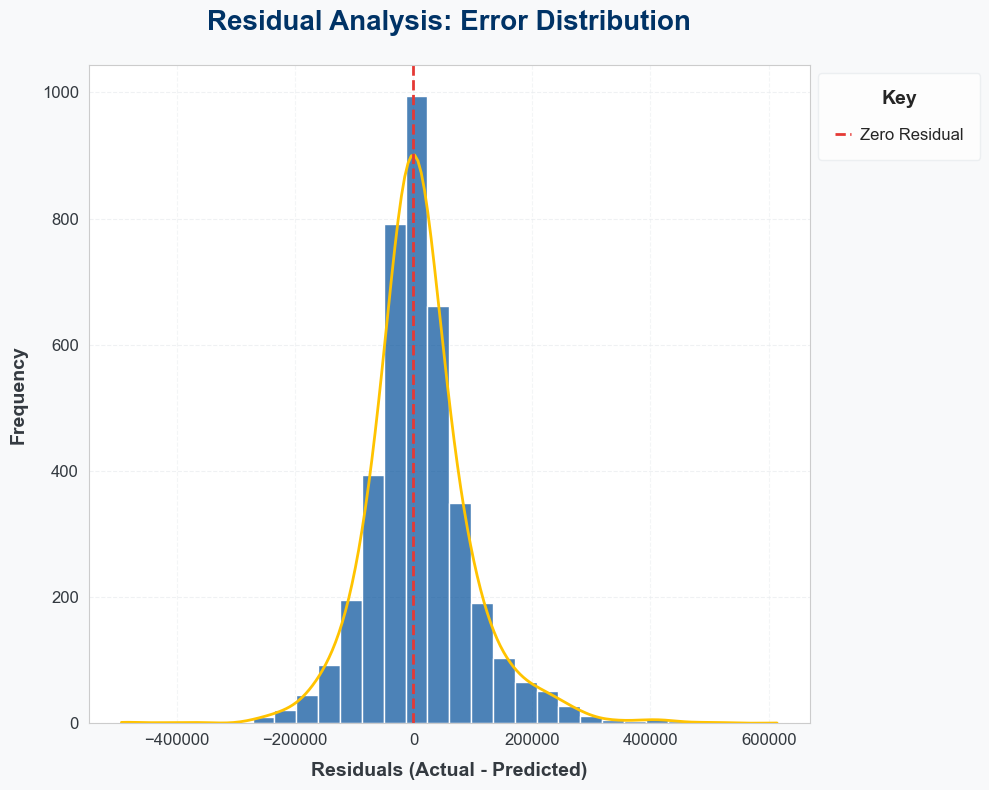

In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures

# ✅ 1. Load the dataset
data_path = r'C:\Users\AMON\Desktop\C200\data\processed\cleaned_dataset_iqr.csv'
df = pd.read_csv(data_path)

# ✅ 2. Preprocessing
features = ["sqft_living", "no_of_bedrooms", "no_of_bathrooms", "sqft_lot", "no_of_floors", "house_age", "zipcode"]
target = "price"

X = df[features]
y = df[target]

# ✅ 3. Log Transformation of Target Variable
y = np.log1p(y)

# ✅ 4. One-Hot Encoding for 'zipcode'
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X[['zipcode']])
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['zipcode']))
X = X.drop(columns=['zipcode'])
X = pd.concat([X, encoded_df], axis=1)

# ✅ 5. Polynomial Feature Creation
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns))

# ✅ 6. Split Data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# ✅ 7. Train LightGBM Model
lgb_model = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42)
lgb_model.fit(X_train, y_train)

# ✅ 8. Make Predictions
y_pred = np.expm1(lgb_model.predict(X_test))
y_test = np.expm1(y_test)

# ✅ 9. Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# ✅ 10. Confidence Interval Calculation
std_dev = np.std(y_test - y_pred)
ci_min = y_pred - (1.96 * std_dev)
ci_max = y_pred + (1.96 * std_dev)


# Set figure size and style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")  # Clean grid background



# Define Porsche-inspired color palette
hist_color = "#004D99"  # Deep Blue - Signature Porsche color
kde_color = "#FFC300"   # Gold - Luxurious touch
line_color = "#E53935"  # Red - Bold emphasis
grid_color = "#E9ECEF"  # Light gray for subtle grids
text_color = "#343A40"  # Dark gray for text contrast

# Create figure with a minimalist background
fig, ax = plt.subplots(figsize=(10, 8), facecolor="#F8F9FA")  # Light gray background
# Plot histogram and KDE
sns.histplot(
    y_test - y_pred,
    bins=30,
    kde=True,
    color=hist_color,
    alpha=0.7,
    kde_kws={"bw_adjust": 1.5}  # Adjusts KDE smoothness (optional)
)

# Adjust KDE line separately
import matplotlib.pyplot as plt
for line in plt.gca().lines:  # Access KDE line in the current axis
    line.set_linewidth(2)
    line.set_color(kde_color)  # Set KDE line color


# Add vertical line at x=0
plt.axvline(x=0, color=line_color, linestyle='--', linewidth=2, label="Zero Residual")


# Styled Title
plt.title(
    "Residual Analysis: Error Distribution",
    fontsize=20,
    fontweight="bold",
    color="#003366",  # Porsche-inspired deep blue
    pad=25
)


# Styled X-axis Label
plt.xlabel(
    "Residuals (Actual - Predicted)",
    fontsize=14,
    fontweight="bold",
    color=text_color,
    labelpad=10
)

# Styled Y-axis Label
plt.ylabel(
    "Frequency",
    fontsize=14,
    fontweight="bold",
    color=text_color,
    labelpad=10
)

# Customize Grid
plt.grid(axis='y', linestyle='--', alpha=0.7, color=grid_color)
plt.grid(axis='x', linestyle='--', alpha=0.5, color=grid_color)

# Customize Tick Labels
plt.tick_params(axis='both', which='major', labelsize=12, colors=text_color)

# Add Legend
legend = plt.legend(
    title="Key",
    fontsize=12,
    frameon=True,
    fancybox=True,
    borderpad=1,
    labelspacing=1.2,
    handlelength=1,
    handletextpad=0.5,
    loc="upper left",
    bbox_to_anchor=(1, 1)
)
legend.get_title().set_fontsize(14)  # Increase legend title size
legend.get_title().set_fontweight("bold")
legend.get_frame().set_edgecolor(grid_color)  # Soft border
legend.get_frame().set_facecolor((1, 1, 1, 0.85))  # Semi-transparent white background

# Adjust layout for cleanliness
plt.tight_layout()

# Show plot
plt.show()